['/home/farmer/D-Mapper/dmapper_examples/covid-19', '/home/farmer/miniconda3/envs/dl/lib/python310.zip', '/home/farmer/miniconda3/envs/dl/lib/python3.10', '/home/farmer/miniconda3/envs/dl/lib/python3.10/lib-dynload', '', '/home/farmer/miniconda3/envs/dl/lib/python3.10/site-packages', '/home/farmer/miniconda3/envs/dl/lib/python3.10/site-packages/setuptools/_vendor', '../..']


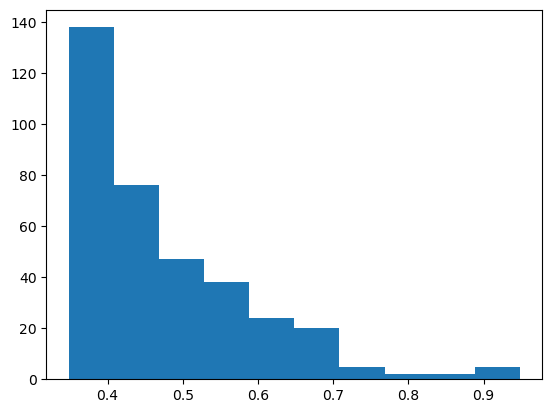

D_Mapper(verbose=2)
Mapping on data shaped (357, 357) using lens shaped (357,)



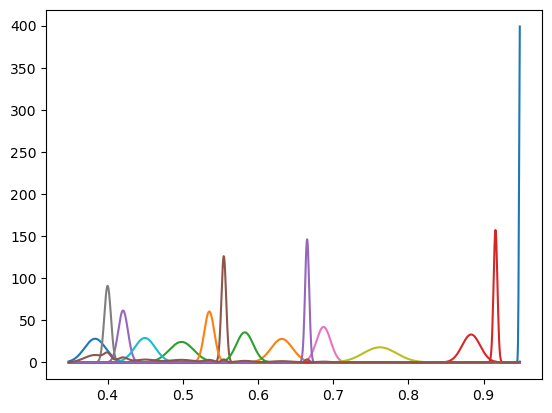

 - Cover - centers: [0.38551924534824394, 0.40014312196837976, 0.4206997181987419, 0.44970757517892324, 0.49838174363238386, 0.5353641516279302, 0.5546183105772745, 0.5825548006599961, 0.6317994079273559, 0.6654294285920628, 0.6873044696444709, 0.7621495532356403, 0.8835219532764151, 0.9159125618174045, 0.9468500031130951]
inner_range: [0.55958861]
radius: [0.036854579818922706, 0.012048633561334066, 0.017775454772453514, 0.037668948089526144, 0.044821349238477914, 0.018104607080895896, 0.00867797339074694, 0.030640440756100285, 0.03919669687669036, 0.007488744450039664, 0.025971969847819243, 0.06081318399486324, 0.03301156649493253, 0.006966413827376172, 0.001373890692723534]
bic:-607.7224828442595
alpha_max:0.01
11 and 12 have no intersection
13 and 14 have no intersection
Minimal points in hypercube before clustering: 3
Creating 15 hypercubes.
There are 160 points in cube 1/15
There are 70 points in cube 2/15
There are 55 points in cube 3/15
There are 87 points in cube 4/15
There ar

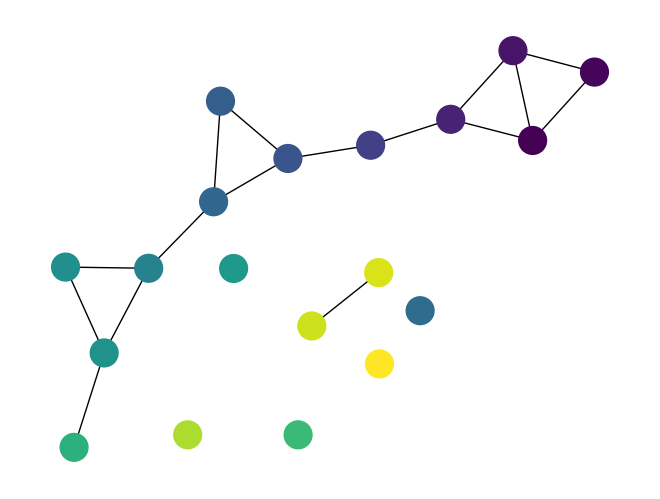

  0%|          | 0/100 [00:00<?, ?it/s]/home/farmer/miniconda3/envs/dl/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
  2%|▏         | 2/100 [00:03<03:12,  1.96s/it]/home/farmer/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
  4%|▍         | 4/100 [00:09<04:05,  2.56s/it]/home/farmer/miniconda3/envs/dl/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
  5%|▌         | 5/100 [00:12<04:12,  2.66s/it]/home/farmer/minicond

SC:-0.041119002957174904
SC_norm:0.4794404985214126
TSR:0.09090909090909091
SC_adj:0.28517479471525176


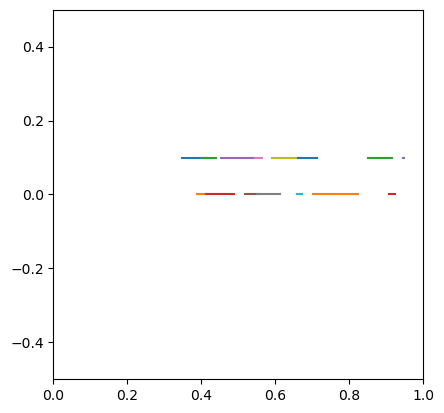

In [1]:
import sys
sys.path.append("../..")
print(sys.path)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import kmapper.evaluate as evaluate
import sklearn

np.random.seed(38)

dm = np.genfromtxt('dis_matrix.csv', delimiter=',')
cl = sklearn.cluster.DBSCAN(eps=0.6,  min_samples=3, metric='precomputed')
scaler = MinMaxScaler()
dm = scaler.fit_transform(dm)

projected_data = np.mean(dm, axis=1)

plt.hist(projected_data)
plt.show()
n = 15 
a = 0.006 
cover = km.D_Cover(n_cubes=n,alpha = a,tol = 1*1e-8,n_init=100,verbose=2)

mapper = km.D_Mapper(verbose=2)

graph = mapper.map(
    projected_data,
    dm,
    clusterer = cl, #0.6 1
    cover=cover,
    precomputed=True
)


color_list = []
size_list = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    size_list.append(10*len(index_list))
    color = np.mean(projected_data[index_list])
    color_list.append(color)
G = km.adapter.to_networkx(graph)

po=nx.kamada_kawai_layout(G)
po["cube7_cluster-1"] = np.array([0.4, -0.25])
po["cube14_cluster-1"] = np.array([0.26, -0.4])
po["cube11_cluster1"] = np.array([-0.02, -0.6])
po["cube12_cluster0"] = np.array([-0.4, -0.6])
nx.draw(G, pos=po, node_color=color_list, node_size = 400)


#plt.savefig('covid19.jpg',dpi=350)
plt.savefig('covid19_dmapper.eps',bbox_inches='tight',dpi=300)
plt.show()

SC_adj = evaluate.compute_SC_adj(dm, projected_data, graph
                                 , Cover = km.D_Cover(n_cubes=n,alpha = a,verbose=0,tol = 1*1e-8)
                                 , type = 'd'
                                 , cluster = cl
                                 , precompute = True)

interval_table = cover.interval_table
for i in range(1,interval_table.shape[1]+1):
    plt.plot([interval_table[0,i-1],interval_table[1,i-1]],[0.1*(i % 2),0.1*(i%2)])

ax = plt.gca()
ax.set_aspect(1)
plt.xlim((0, 1))
plt.ylim((-0.5, 0.5))
plt.show()

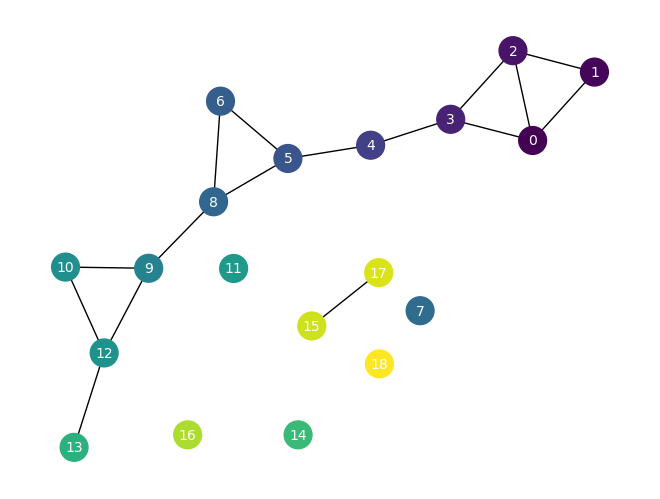

/tmp/ipykernel_21436/1165802277.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[node_id].iloc[id_list] = 1


In [2]:
nx.draw(G, pos=po, node_color=color_list, node_size = 400)
nx.draw_networkx_labels(G, pos=po, labels= {n: i for i,n in enumerate(G)},
                        font_color="White", font_size=10) 
plt.savefig('covid19_dmapper_label.eps',bbox_inches='tight',dpi=300)
plt.show()

import pandas as pd
id_lineage = pd.read_csv("S2-ID_lineages.csv")
lineages_list = list(id_lineage["lineages"])
node_id_list = [n for n in G]

df = pd.DataFrame(0,index=lineages_list, columns=node_id_list)
for node_id in node_id_list:
    id_list = graph["nodes"][node_id]
    df[node_id].iloc[id_list] = 1

df.to_csv("dmapper_result.csv")

KeplerMapper(verbose=2)
Mapping on data shaped (357, 357) using lens shaped (357,)

Minimal points in hypercube before clustering: 3
Creating 15 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 2 clusters in hypercube 7.
   > Found 2 clusters in hypercube 8.
   > Found 2 clusters in hypercube 9.
   > Found 3 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.

Created 18 edges and 20 nodes in 0:00:00.015574.


100%|██████████| 100/100 [00:06<00:00, 14.67it/s]


SC:-0.04233593040283705
SC_norm:0.4788320347985815
TSR:0.25
SC_adj:0.36441601739929075


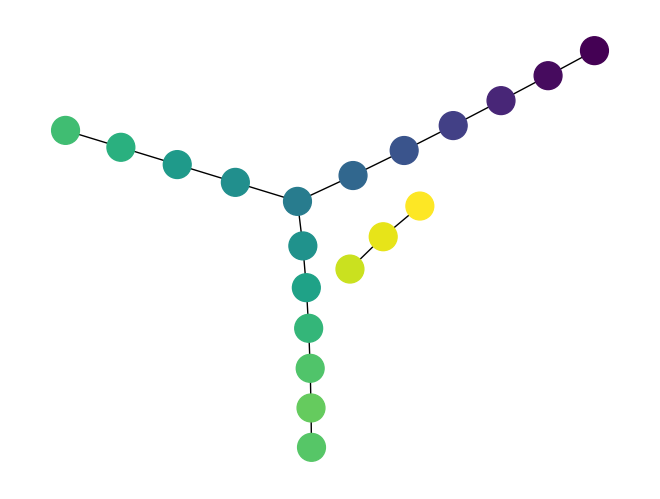

In [3]:
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import kmapper.evaluate as evaluate


dm = np.genfromtxt('dis_matrix.csv', delimiter=',')

scaler = MinMaxScaler()
dm = scaler.fit_transform(dm)

projected_data = np.mean(dm, axis=1)
mapper = km.KeplerMapper(verbose=2)
p = 0.49
n = 15
cover = km.Cover(n_cubes=n,perc_overlap=p)

graph = mapper.map(projected_data,
    dm,
    clusterer = cl, #0.6 1
    cover=cover,
    precomputed=True   )


SC_adj = evaluate.compute_SC_adj(dm, projected_data, graph, 
                                 Cover = cover
                                ,type = 'k'
                                , precompute = True)

color_list4 = []
size_list = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    size_list.append(10*len(index_list))
    color = np.mean(projected_data[index_list])
    color_list4.append(color)
G = km.adapter.to_networkx(graph)
po=nx.kamada_kawai_layout(G)
'''po["cube14_cluster-1"] = np.array([0.4, -0.25])
po["cube14_cluster0"] = np.array([0.26, -0.4])
po["cube10_cluster-1"] = np.array([-0.02, -0.4])
po["cube11_cluster-1"] = np.array([-0.3, -0.35])
po["cube12_cluster-1"] = np.array([0.3, -0.3])
po["cube8_cluster-1"] = np.array([-0.1, -0.3])'''
nx.draw(G, pos=po, node_color=color_list4, node_size =400)
plt.savefig("covid19_mapper.eps",dpi=300)
plt.show()

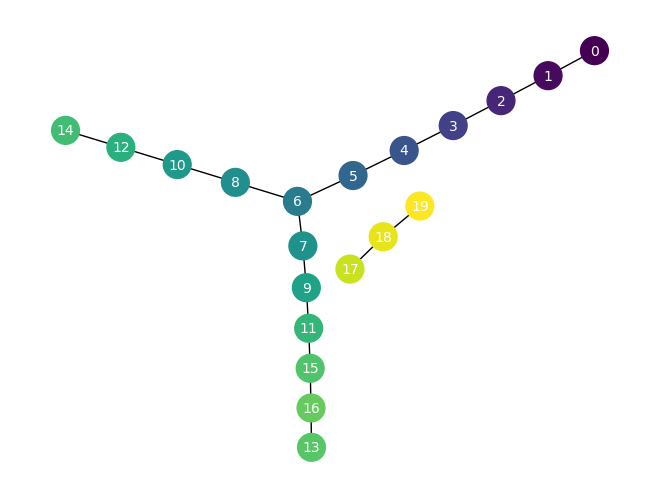

/tmp/ipykernel_21436/2779783653.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[node_id].iloc[id_list] = 1


In [4]:
nx.draw(G, pos=po, node_color=color_list4, node_size = 400)
nx.draw_networkx_labels(G, pos=po, labels= {n: i for i,n in enumerate(G)},
                        font_color="White", font_size=10) 
plt.savefig('covid19_mapper_label.eps',bbox_inches='tight',dpi=300)
plt.show()

import pandas as pd
id_lineage = pd.read_csv("S2-ID_lineages.csv")
lineages_list = list(id_lineage["lineages"])
node_id_list = [n for n in G]

df = pd.DataFrame(0,index=lineages_list, columns=node_id_list)
for i,node_id in enumerate(node_id_list):
    id_list = graph["nodes"][node_id]
    df[node_id].iloc[id_list] = 1

df.columns = range(len(node_id_list))
df.to_csv("mapper_result.csv")